# Задание 1

In [ ]:
!pip install cylp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install coinor.grumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pypolyhedron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from builtins import range
from past.utils import old_div

In [ ]:
import pypolyhedron

In [ ]:
from coinor.grumpy import polyhedron2D

In [ ]:
from coinor.grumpy.polyhedron2D import Polyhedron2D, Figure

In [ ]:
from google.colab import files
files.upload()

Saving EX2.py to EX2 (1).py
Saving EX1.py to EX1 (1).py


{'EX1.py': b"numVars = 2\r\nnumCons = 6\r\nA = [[ -8,     30],\r\n     [ -2,    -4],\r\n     [-14,     8],\r\n     [  2,   -36],\r\n     [  30, -8],\r\n     [  10,     10],\r\n#     [  1,    -8],\r\n     ]\r\nb = [115,\r\n     -5,\r\n      1,\r\n     -5,\r\n     191,\r\n     127,\r\n#     2\r\n    ]\r\nsense = ('Max', '<=')\r\nintegerIndices = [0, 1]\r\n#Variations\r\n#points = [[2.5, 4.5], [6.5, 0.5], [0.5, 1],\r\n#          [7, 5.7], [7.7, 5], [2, 0.25]]\r\n#points = [[0, 0], [2.5, 4.5], [7.75, 5.75], [6.5, 0.5]]\r\n#points = [[0, 0], [2.5, 4.5], [7.5, 5.5], [6.5, 0.5]]\r\n\r\n#This is the integer hull\r\n#A = [[ 0, -1],\r\n# [-1, 1],\r\n# [-2,  1],\r\n# [-1,  2],\r\n# [ 2, -1],\r\n# [ 0,  1],\r\n# [ 1, 0],\r\n# ]\r\n\r\n#b = [ -1,   \r\n#   1,  \r\n#  -1,   \r\n#   5,  \r\n#  11,   \r\n#   5,   \r\n#   7]\r\n\r\nc = [-1, 1]\r\n#c = [1, -1]\r\nobj_val = 2 \r\n\r\n#Rank 1 inequalities\r\ncuts = [\r\n     [-1.26, 2.72], \r\n#    pypolyhedron doesn't like the full-recision version \r\n#

Iteration  0
Current bound: -1.9999999999999996
Current solution:  [2.5 4.5]
Adding cut:  [-1.25843  2.7191 ] <= 8.08989
Adding cut:  [-2.71911  2.69662] <= 4.33708
Iteration  1
Current bound: -1.6292360906348753
Current solution:  [2.50558589 4.13482198]
Adding cut:  [-7.33386 14.69049] <= 41.36698
Adding cut:  [-5.41653  7.33325] <= 15.75013
Iteration  2
Current bound: -1.625016053390628
Current solution:  [2.0000214  3.62503746]
Adding cut:  [-36517.70808  49438.69032] <= 106179.90652
Adding cut:  [-5.45329  4.71606] <= 5.18921
Iteration  3
Current bound: -1.492329145949256
Current solution:  [2.50763506 3.9999642 ]
Adding cut:  [-51124.92822  44214.35178] <= 48652.16214
Adding cut:  [-9.10654  9.57901] <= 14.47985
Iteration  4
Current bound: -1.4129731737104234
Current solution:  [2.00005469 3.41302786]
Adding cut:  [-92474.61968  97271.38157] <= 147034.63886
Adding cut:  [-22.0515   21.49191] <= 28.24832
Iteration  5
Current bound: -1.3825197330809087
Current solution:  [2.6173978

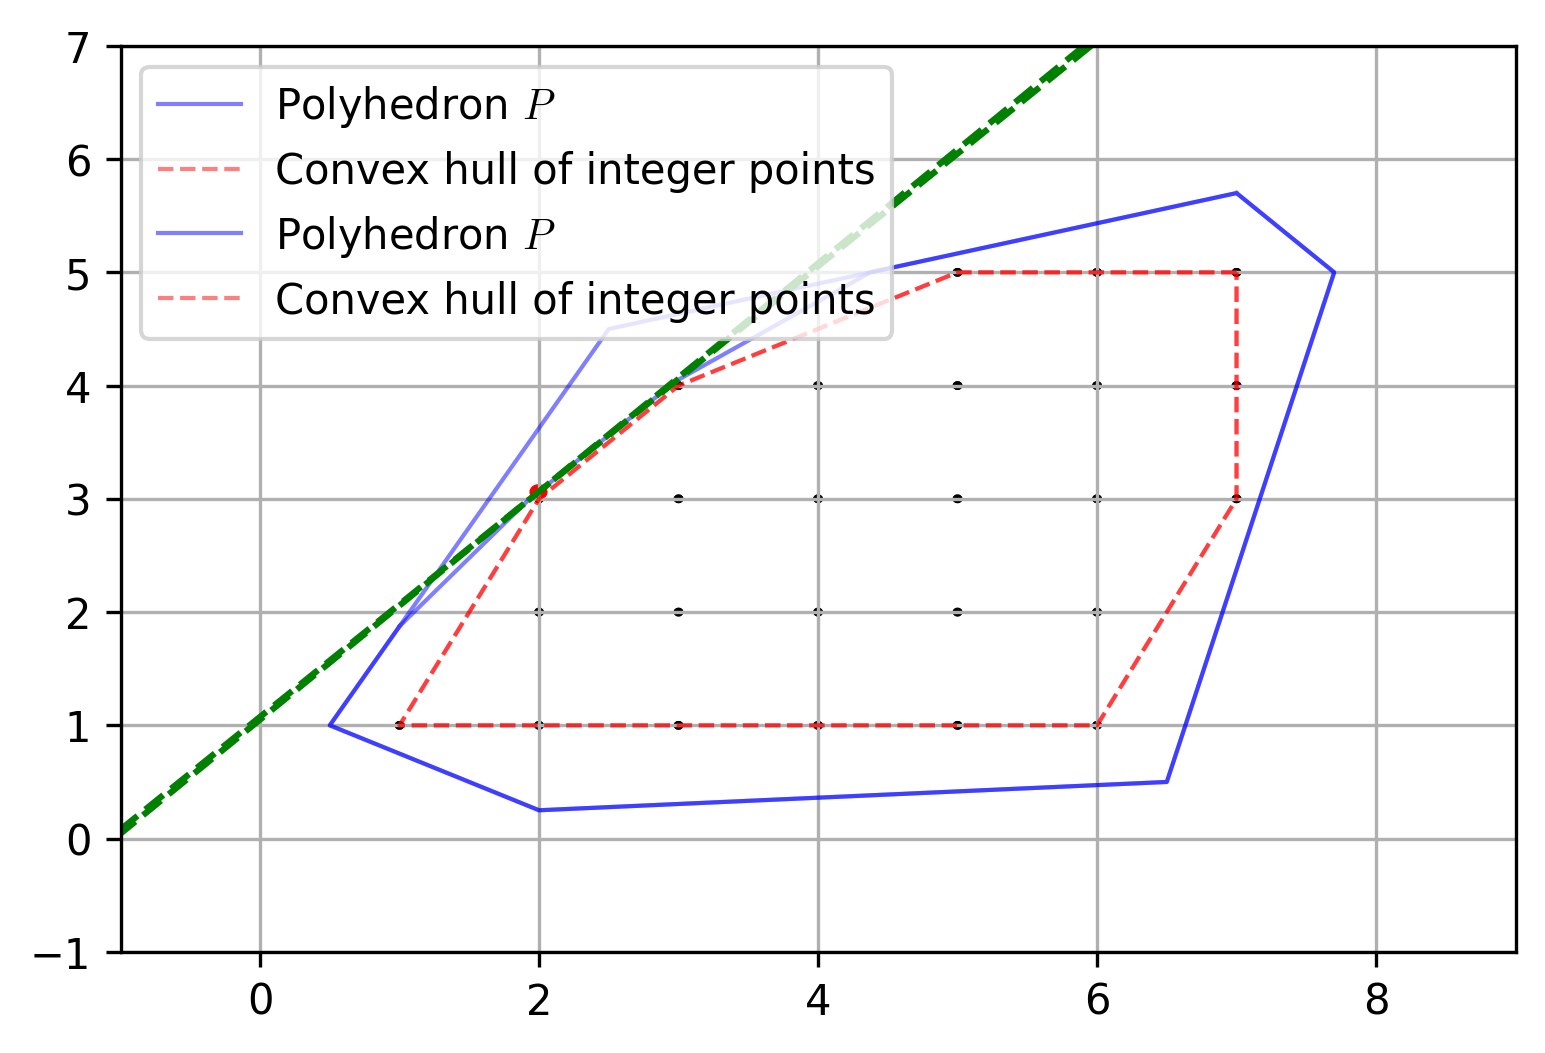

In [ ]:

from math import floor
import numpy as np
from cylp.py.utils.sparseUtil import csc_matrixPlus 
from cylp.cy import CyClpSimplex
from cylp.py.modeling import CyLPArray, CyLPModel





EPS = 5
import importlib as ilib

class MILPInstance(object):
    def __init__(self, module_name = None, file_name = None,
                 A = None, b = None, c = None,
                 points = None, rays = None,
                 l = None, u = None,
                 sense = None, integerIndices = None, 
                 numVars = None):
        
        if file_name is not None:
            # We got a file name, so ignore everything else and read in the instance
            lp = CyClpSimplex()
            lp.extractCyLPModel(file_name)
            self.integerIndices = [i for (i, j) in enumerate(lp.integerInformation) if j == True]
            infinity = lp.getCoinInfinity()
            self.A = lp.coefMatrix
            self.b = CyLPArray([0 for _ in range(lp.nRows)])
            for i in range(lp.nRows):
                if lp.constraintsLower[i] > -infinity:
                    if lp.constraintsUpper[i] < infinity:
                        raise Exception('Cannot handle ranged constraints')
                    self.b[i] = -lp.constraintsLower[i]
                    for j in range(lp.nCols):
                        self.A[i, j] = -self.A[i, j]
                elif lp.constraintsUpper[i] < infinity:
                    self.b[i] = lp.constraintsUpper[i]
                else:
                    raise Exception('Constraint with no bounds detected')
            #x = lp.addVariable('x', lp.nCols)
            #lp += A * x <= b
            #lp += x <= lp.variablesUpper
            #lp += x >= lp.variablesLower
            #lp.objective = lp.objective
            self.c = lp.objective
            self.sense = '<='
            numVars = lp.nCols
            self.lp = lp
            self.l = lp.variablesLower
            self.u = lp.variablesUpper
            self.x = lp.getVarByName('x')
        else:
            min_or_max = None
            if module_name is not None:
                # We got a module name, read the data from there
                mip = ilib.import_module(module_name)
                self.A = mip.A if hasattr(mip, 'A') else None
                self.b = mip.b if hasattr(mip, 'b') else None
                points = mip.points if hasattr(mip, 'points') else None
                rays = mip.rays if hasattr(mip, 'rays') else None
                self.c = mip.c if hasattr(mip, 'c') else None
                self.sense = mip.sense[1] if hasattr(mip, 'sense') else None
                min_or_max = mip.sense[0] if hasattr(mip, 'sense') else None
                self.integerIndices = mip.integerIndices if hasattr(mip, 'integerIndices') else None
                self.u = CyLPArray(mip.u) if hasattr(mip, 'u') else None
                self.l = CyLPArray(mip.l) if hasattr(mip, 'l') else None
                numVars = mip.numVars if hasattr(mip, 'numVars') else None
                self.x_sep = mip.x_sep if hasattr(mip, 'x_sep') else None
                if numVars is None and mip.A is not None:
                    numVars = len(mip.A)
       
                if numVars is None:
                    raise "Must specify number of variables when problem is not"   
            else:
                self.A = A
                self.b = b
                self.c = c
                self.l = l
                self.u = u
                self.points = points
                self.rays = rays
                if sense is not None:
                    self.sense = sense[1]
                    min_or_max = sense[0]
                self.integerIndices = integerIndices
                
            lp = CyClpSimplex()
            if self.A is not None:
                A = np.matrix(self.A)
                b = CyLPArray(self.b)
            elif numVars <= 2 and GRUMPY_INSTALLED:
                p = Polyhedron2D(points = points, rays = rays)
                A = np.matrix(p.hrep.A)
                b = np.matrix(p.hrep.b)
            else:
                raise "Must specify problem in inequality form with more than two variables\n"   
        
                
            x = lp.addVariable('x', numVars)

            if l is not None:
                lp += x >= l
            if u is not None:
                lp += x <= u
            lp += (A * x <= b if self.sense == '<=' else
                   A * x >= b)
            c = CyLPArray(self.c)
            if min_or_max == 'Max':
                lp.objective = -c * x
            else:
                lp.objective = c * x
            self.lp = lp
            self.x = x

def isInt(x, eps = EPS):
    '''
    Return True if x is an integer, or if x is a numpy array
    with all integer elements, False otherwise
    '''
    if isinstance(x, (int, float)):
        return abs(floor(x + 10**(-eps)) - x) < 10**(-eps)
    return (np.abs(np.around(x) - x) < 10**(-eps)).all()

def getFraction(x, eps = EPS):
    'Return the fraction part of x: x - floor(x)'
#    return x - floor(x)
    return np.around(x, decimals = eps) - floor(np.around(x, decimals = eps))

def gomoryMixedIntegerCut(m, rowInds = None, eps = EPS, debug_print = False):
    '''Return the Gomory mixed integer cut of rows in ``rowInds`` of lp 
    (a CyClpSimplex object)'''

    cuts = []
    lp = m.lp
    sol = lp.primalVariableSolution['x']
    if rowInds is None:
        rowInds = list(range(lp.nConstraints))
    for row in rowInds:
        basicVarInd = lp.basicVariables[row]
        if (basicVarInd in m.integerIndices) and (not isInt(sol[basicVarInd], eps)):
            f0 = getFraction(sol[basicVarInd], eps)
            f = []
            for i in range(lp.nVariables):
                if i in lp.basicVariables:
                    #This is to try to avoid getting very small numbers that 
                    #should be zero
                    f.append(0)
                else:
                    f.append(getFraction(lp.tableau[row, i], eps))
            pi = np.array([old_div(f[j],f0) if f[j] <= f0 
                           else old_div((1-f[j]),(1-f0)) for j in range(lp.nVariables)])
            pi_slacks = np.array([old_div(x,f0) if x > 0 else old_div(-x,(1-f0))  
                                 for x in lp.tableau[row, lp.nVariables:]])
            pi -= pi_slacks * lp.coefMatrix
            pi0 = (1 - np.dot(pi_slacks, lp.constraintsUpper) if m.sense == '<='
                   else 1 + np.dot(pi_slacks, lp.constraintsUpper))
            if m.sense == '>=':
                cuts.append((pi, pi0))
            else:
                cuts.append((-pi, -pi0))
    return cuts, []

def liftAndProject(m, rowInds = None, eps = EPS, debug_print = False):
    '''Return the lift-and-project associated with variables that are basic in 
    rows in ``rowInds`` of lp (a CyClpSimplex object)'''

    cuts = []
    lp = m.lp
    sol = lp.primalVariableSolution['x']
    if rowInds is None:
        rowInds = list(range(lp.nConstraints))
    for row in rowInds:
        basicVarInd = lp.basicVariables[row]
        if (basicVarInd in m.integerIndices) and (not isInt(sol[basicVarInd], eps)): 
            e = np.zeros(lp.nCols)
            e[basicVarInd] = 1
            #Call function for solving CGLP for the associated variable
            #disjunction (disjunction is "<=") 
            cuts += disjunctionToCut(m, e, floor(sol[basicVarInd]), eps = eps,
                                     debug_print = debug_print)
    return cuts, []
            
def disjunctionToCut(m, pi, pi0, debug_print = False, use_cylp = True, eps = EPS):
    '''Generate the most violated valid inequality from a given disjunction'''
    me = "cglp_cuts: "
    lp = m.lp
    sol = lp.primalVariableSolution['x']

    if debug_print:
        print(me, "constraints sense = ", m.sense)
        print(me, "matrix = ")
        print(m.A)
        print(me, "rhs = ", m.b)
        print(me, "vars lower bounds = ", lp.variablesLower)
        print(me, "vars upper bounds = ", lp.variablesUpper)
        print(me, "objective = ", lp.objective)
        print(me, "current solution = ", sol)
        print(me, "pi = ", pi)
        print(me, "pi0 = ", pi0)

    ############################################################################
    ## There are two given LPs:
    ## s.t. Ax >= b           s.t. Ax >= b
    ##   -pi.x >= -pi_0          pi.x >= pi_0+1
    ## A, b, c, pi, pi_0 are given
    ##
    ## CGLP: alpha.x >= beta should be valid for both LPs above
    ##
    ## min alpha.x* - beta
    ## uA - u0.pi = alpha
    ## vA + v0.pi = alpha
    ## ub - u0.pi_0 >= beta 
    ## vb + v0.(pi_0 + 1) >= beta 
    ## u0 + v0 = 1
    ## u, v, u0, v0 >= 0
    ## if min value comes out < 0, then (alpha.x >= beta) is a cut.
    ############################################################################

    pi = CyLPArray(pi)
    
    Atran = m.A.transpose()
    b = CyLPArray(m.b)
    numRows, numCols = m.A.shape
    
    if use_cylp:
        sp = CyLPModel()
        u = sp.addVariable('u', numRows, isInt = False)
        v = sp.addVariable('v', numRows, isInt = False)
        u0 = sp.addVariable('u0', 1, isInt = False)
        v0 = sp.addVariable('v0', 1, isInt = False)
        alpha = sp.addVariable('alpha', lp.nVariables, isInt = False)
        beta = sp.addVariable('beta', 1, isInt = False)
        
        #This should be as simple as this, but it doesn't work.
        #Maybe a bug in CyLP? 
        #sp += alpha - Atran*u - pi*u0 == 0
        #sp += alpha - Atran*v + pi*v0 == 0
        for i in range(numCols):
            sp += alpha[i] - sum(Atran[i,j]*u[j] for j in range(numRows)) - pi[i]*u0 == 0
        for i in range(numCols):
            sp += alpha[i] - sum(Atran[i,j]*v[j] for j in range(numRows)) + pi[i]*v0 == 0
        if m.sense == '<=':
            sp += beta - b*u - pi0*u0 >= 0
            sp += beta - b*v + (pi0 + 1)*v0 >= 0
        else:
            sp += beta - b*u - pi0*u0 <= 0
            sp += beta - b*v + (pi0 + 1)*v0 <= 0
        sp += u0 + v0 == 1
        sp += u >= 0
        sp += v >= 0
        sp += u0 >= 0
        sp += v0 >= 0
        if m.sense == '<=':
            sp.objective = sum(-sol[i]*alpha[i] for i in range(numCols)) + beta
        else:
            #This direction is not debugged
            sp.objective = sum(sol[i]*alpha[i] for i in range(numCols)) - beta            

        cglp = CyClpSimplex(sp)
        # If we want to solve it as an MILP
        # cglp = CyClpSimplex(sp).getCbcModel()
        #cglp.writeLp('lp.lp')
        cglp.logLevel = 0
        cglp.primal(startFinishOptions = 'x')
        # Solve as MILP
        # cglp.solve()
        beta = cglp.primalVariableSolution['beta'][0]
        alpha = cglp.primalVariableSolution['alpha']
        u = cglp.primalVariableSolution['u']
        v = cglp.primalVariableSolution['v']
        u0 = cglp.primalVariableSolution['u0'][0]
        v0 = cglp.primalVariableSolution['v0'][0]
        if debug_print:
            print(me, 'Objective Value: ', cglp.objectiveValue)

        if debug_print:
            print(me, 'u: ', u)
            print(me, 'v: ', v)
            print(me, 'u0: ', u0)
            print(me, 'v0: ', v0)
    else: 
        CG = AbstractModel()
        CG.u = Var(list(range(numRows)), domain=NonNegativeReals,
                   bounds = (0.0, None))
        CG.v = Var(list(range(numRows)), domain=NonNegativeReals,
                   bounds = (0.0, None))
        CG.u0 = Var(domain=NonNegativeReals, bounds = (0.0, None))
        CG.v0 = Var(domain=NonNegativeReals, bounds = (0.0, None))
        CG.alpha = Var(list(range(numRows)), domain=Reals,
                       bounds = (None, None))    
        CG.beta  = Var(domain=Reals, bounds = (None, None))    
        
        ## Constraints
        def pi_rule_left(CG, i):
            x = float(pi[i])
            return(sum(Atran[i, j]*CG.u[j] for j in range(numRows)) -
                   x*CG.u0 - CG.alpha[i] == 0.0)
        CG.pi_rule_left = Constraint(list(range(numCols)), rule=pi_rule_left)
        
        def pi_rule_right(CG, i):
            x = float(pi[i])
            return(sum(Atran[i, j]*CG.v[j] for j in range(numRows)) +
                   x*CG.v0 - CG.alpha[i] == 0.0)
        CG.pi_rule_right = Constraint(list(range(numCols)), rule=pi_rule_right)

        if m.sense == '<=':
            def pi0_rule_left(CG):
                return(sum(b[j]*CG.u[j] for j in range(numRows)) -
                       pi0*CG.u0 - CG.beta <= 0.0)
            CG.pi0_rule_left = Constraint(rule=pi0_rule_left)
            
            def pi0_rule_right(CG):
                return(sum(b[j]*CG.v[j] for j in range(numRows)) +
                       (pi0 + 1)*CG.v0 - CG.beta <= 0.0)
            CG.pi0_rule_right = Constraint(rule=pi0_rule_right)
        else:
            def pi0_rule_left(CG):
                return(sum(b[j]*CG.u[j] for j in range(numRows)) -
                       pi0*CG.u0 - CG.beta >= 0.0)
            CG.pi0_rule_left = Constraint(rule=pi0_rule_left)
            
            def pi0_rule_right(CG):
                return(sum(b[j]*CG.v[j] for j in range(numRows)) +
                       (pi0 + 1)*CG.v0 - CG.beta >= 0.0)
            CG.pi0_rule_right = Constraint(rule=pi0_rule_right)

        def normalization_rule(CG):
            return(CG.u0 + CG.v0 == 1.0)
        CG.normalization_rule = Constraint(rule=normalization_rule)
        
        def objective_rule(CG):
            return(sum(sol[i]*CG.alpha[i] for i in range(numCols)) -
                   CG.beta)
        if m.sense == '<=':
            CG.objective = Objective(sense=maximize, rule=objective_rule)
        else:
            CG.objective = Objective(sense=minimize, rule=objective_rule)
        
        opt = SolverFactory("cbc")
        instance = CG.create_instance()
        #instance.pprint()
        #instance.write("foo.nl", format = "nl")
        #opt.options['bonmin.bb_log_level'] = 5
        #opt.options['bonmin.bb_log_interval'] = 1
        results = opt.solve(instance, tee=False)
        #results = opt.solve(instance)
        instance.solutions.load_from(results)
        
        beta = instance.beta.value
        alpha = np.array([instance.alpha[i].value
                          for i in range(lp.nVariables)])
        
    violation =  beta - np.dot(alpha, sol) 
    if debug_print:
        print(me, 'Beta: ', beta)
        print(me, 'alpha: ', alpha)
        print(me, 'Violation of cut: ', violation)

    
    if np.abs(violation) > 10**(-eps):
        return [(alpha, beta)]

    print('No violated cuts found solving CGLP', violation)
    return []

def disp_relaxation(f, A, b, cuts = [], sol = None, disj = [], filename = None):
    #TODO: Check sense of inequalities by looking explicitly at
    #      lp.constraintsUpper and lp.constraintsLower
    p = Polyhedron2D(A = A, b = b)
    f.add_polyhedron(p, label = 'Polyhedron $P$')
    f.set_xlim(p.xlim)
    f.set_ylim(p.ylim)
    pI = p.make_integer_hull()
    f.add_polyhedron(pI, show_int_points = True, color = 'red',
                     linestyle = 'dashed',
                     label = 'Convex hull of integer points')
    for (coeff, r) in cuts:
        f.add_line(coeff, r, p.xlim, p.ylim, color = 'green', linestyle = 'dashed')
    for (coeff, r) in disj:
        f.add_line(coeff, r, p.xlim, p.ylim, color = 'red', linestyle = 'dashed')
        f.add_line(coeff, r+1, p.xlim, p.ylim, color = 'red', linestyle = 'dashed')
    if sol is not None:
        f.add_point(sol, radius = .05)
    f.show(filename = filename)


def solve(m, whichCuts = [], use_cglp = False, debug_print = False, eps = EPS, 
          max_iter = 50, max_cuts = 5, display = False, filename = None):    

    if not isinstance(m, MILPInstance):
        print("Invalid first parameter: Must be of type MILPInstance")
        exit

    f = Figure()
  
    if m.lp.nCols > 2 or m.A is None:
        display = False
    m.lp.logLevel = 0

    #Include bounds explicitly in the constraint matrix for display and for
    #use in cut generators. 
    infinity = m.lp.getCoinInfinity()
    if m.sense == '<=':
        b = m.lp.constraintsUpper.copy()
        mult = -1.0
    else:
        b = m.lp.constraintsLower.copy()
        mult = 1.0
    if type(m.A) == csc_matrixPlus:
        A = m.A.toarray()
    else:
        A = m.A.copy()
    for i in range(m.lp.nCols):
        e = np.zeros((1, m.lp.nCols))
        if m.lp.variablesUpper[i] < infinity:
            b.resize(b.size+1, refcheck = False)
            e[0, i] = -mult
            b[-1] = -mult*m.lp.variablesUpper[i]
            A = np.vstack((A, e))
        if m.lp.variablesLower[i] > -infinity:
            b.resize(b.size+1, refcheck = False)
            e[0, i] = mult
            b[-1] = mult*m.lp.variablesLower[i]
            A = np.vstack((A, e))
    m.A = A
    m.b = b
    if display and filename is not None:
        disp_relaxation(f, m.A, m.b, filename = filename+'.png')
    elif display:
        disp_relaxation(f, m.A, m.b)
   
    disj = []
    prev_sol = np.zeros((1, m.lp.nCols))
    for i in range(max_iter):
        print('Iteration ', i)
        m.lp.primal(startFinishOptions = 'x')
        print('Current bound:', m.lp.objectiveValue)
        #Binv = np.zeros(shape = (lp.nConstraints, lp.nConstraints))
        #for i in range(lp.nVariables, lp.nVariables+lp.nConstraints):
        #    lp.getBInvACol(i, Binv[i-lp.nVariables,:])
        #rhs = lp.rhs
        if m.sense == '<=':
            rhs = np.dot(m.lp.basisInverse, m.lp.constraintsUpper)
        else:
            rhs = np.dot(m.lp.basisInverse, m.lp.constraintsLower)
        sol = m.lp.primalVariableSolution['x']
        if debug_print:
            print('Current basis inverse:')
            print(m.lp.basisInverse)
            print('Condition number of basis inverse',
                  np.around(np.linalg.cond(m.lp.basisInverse)))
            print('Current tableaux:')
            print(m.lp.tableau)
            print('Current right hand side:\n', rhs)
            #print('Dual solution:', m.lp.dualConstraintSolution)
            #print lp.rhs
        print('Current solution: ', sol)

        if (sol - prev_sol).any():
            prev_sol = sol
        else:
            print ("Solution repeated, stalling detected") 
            print ("Exiting")
            break

        if isInt(sol[m.integerIndices], eps):
            print('Integer solution found!')
            break

        if np.around(np.linalg.cond(m.lp.basisInverse)) >= 10**32:
            print ("Condition number of the basis matrix exceeds 10^32") 
            print ("Exiting")
            break

        cuts = []
        if disj == []:
            for (cg, args) in whichCuts:
                tmp_cuts, tmp_disj = cg(m, **args, eps = eps)
                cuts += tmp_cuts
                disj += tmp_disj
        cur_num_cuts = len(cuts)
        if use_cglp:
            if len(disj) > 0:
                for d in disj:
                    cuts += disjunctionToCut(m, d[0], d[1], eps = eps)
        if cuts == []:
            if disj == []:
                print('No cuts found and terminating!')
                break
            else:
                print('No cuts found but continuing!')
        
        if len(cuts) == cur_num_cuts:
            disj = []
        for (coeff, r) in cuts[:max_cuts]:
            #TODO sort cuts by degree of violation
            if m.sense == '<=':
                coeff = np.floor(coeff*(10**eps))/(10**eps)
                r = np.ceil(r*(10**eps))/(10**eps)
                print('Adding cut: ', coeff, '<=', r)
                m.lp += CyLPArray(coeff) * m.x <= r
            else:
                coeff = np.ceil(coeff*(10**eps))/(10**eps)
                r = np.floor(r*(10**eps))/(10**eps)
                print('Adding cut: ', coeff, '>=', r)
                m.lp += CyLPArray(coeff) * m.x >= r
            m.A = np.vstack((m.A, np.array(coeff)))
            m.b.resize(m.b.size+1, refcheck = False)
            m.b[-1] = r
            
    if display and filename is not None:
      disp_relaxation(f, m.A, m.b, cuts, sol,
                            filename = filename+str('2')+'.png')
    elif display:
      disp_relaxation(f, m.A, m.b, cuts, sol)

solve(MILPInstance(module_name = 'EX1'),
          whichCuts = [(gomoryMixedIntegerCut, {})],
          display = True, debug_print = False, use_cglp = False, filename = '1')

Iteration  0
Current bound: -6.499999999999999
Current solution:  [3.75 2.75]
Adding cut:  [1.33333 0.     ] <= 4.0
Adding cut:  [0.      1.33333] <= 2.66667
Iteration  1
Current bound: -5.000015000037502
Current solution:  [3.0000075 2.0000075]
Integer solution found!


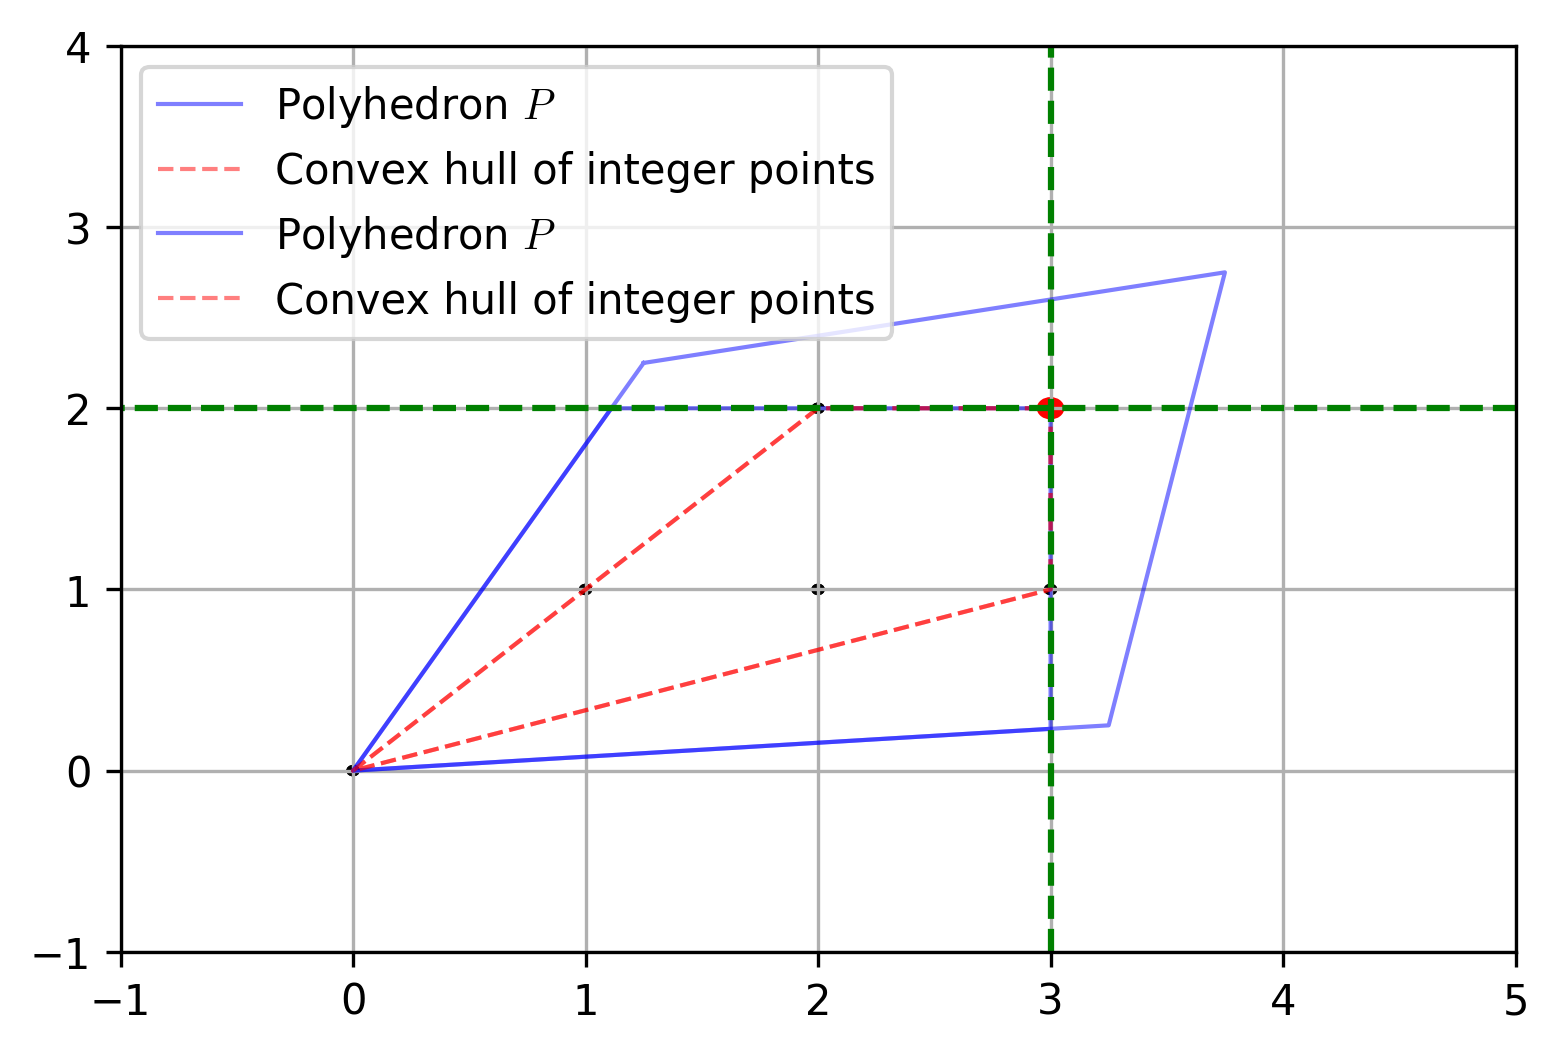

In [ ]:
solve(MILPInstance(module_name = 'EX2'),
          whichCuts = [(gomoryMixedIntegerCut, {})],
          display = True, debug_print = False, use_cglp = False, filename = '2')

# Задание 2

## branch-and-bound алгоритм

https://github.com/coin-or/GrUMPy библиотека для BranchAndBound

Starting Branch and Bound
Most fractional variable
Best first search strategy

----------------------------------------------------

Node: 0, Depth: 0, LB: None
LP Solved, status: Optimal, obj: 61.00000001
Fractional solution:
x2 = 1.0
x3 = 1.0
x4 = 1.0
x5 = 1.0
x6 = 1.0
x7 = 1.0
x9 = 1.0
x10 = 1.0
x11 = 1.0
x12 = 0.66666667
x13 = 1.0
x14 = 1.0
Branching on variable x12


NameError: ignored

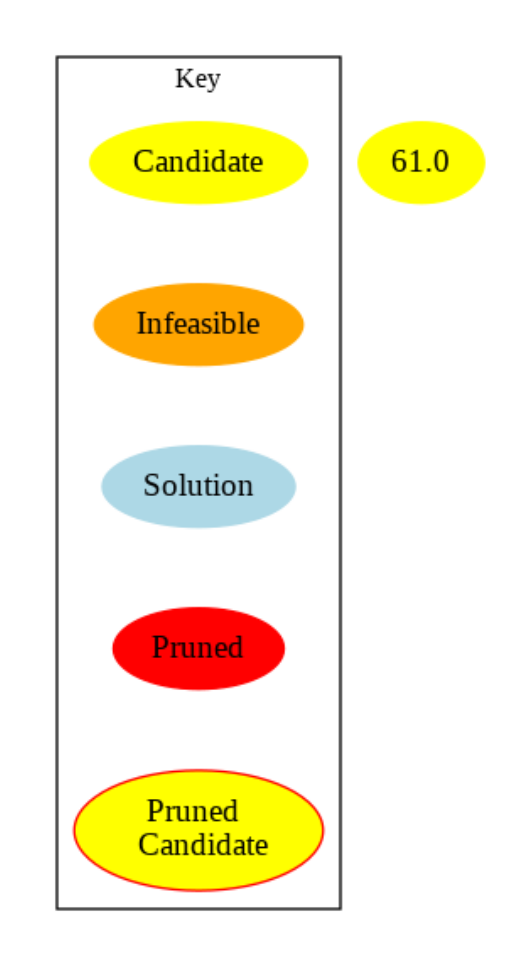

In [ ]:
from coinor.grumpy import BranchAndBound, BBTree
from coinor.grumpy.BranchAndBound import GenerateRandomMIP, BranchAndBound
from coinor.grumpy.BBTree import MOST_FRACTIONAL,BEST_FIRST
T = BBTree()
T.set_layout('dot')
#T.set_layout('dot2tex')
#T.set_display_mode('file')
#T.set_display_mode('xdot')
T.set_display_mode('matplotlib')

CONSTRAINTS, VARIABLES, OBJ, MAT, RHS = GenerateRandomMIP(numVars = 15,
                                                              numCons = 5,
                                                              rand_seed = 120)
BranchAndBound(T, CONSTRAINTS, VARIABLES, OBJ, MAT, RHS,
                   branch_strategy = MOST_FRACTIONAL,
                   search_strategy = BEST_FIRST,
                   display_interval = 1)



# ТЕСТ

In [ ]:
import time

Iteration  0
Current bound: -1.9999999999999996
Current solution:  [2.5 4.5]
Adding cut:  [-1.25843  2.7191 ] <= 8.08989
Adding cut:  [-2.71911  2.69662] <= 4.33708
Iteration  1
Current bound: -1.6292360906348753
Current solution:  [2.50558589 4.13482198]
Adding cut:  [-7.33386 14.69049] <= 41.36698
Adding cut:  [-5.41653  7.33325] <= 15.75013
Iteration  2
Current bound: -1.625016053390628
Current solution:  [2.0000214  3.62503746]
Adding cut:  [-36517.70808  49438.69032] <= 106179.90652
Adding cut:  [-5.45329  4.71606] <= 5.18921
Iteration  3
Current bound: -1.492329145949256
Current solution:  [2.50763506 3.9999642 ]
Adding cut:  [-51124.92822  44214.35178] <= 48652.16214
Adding cut:  [-9.10654  9.57901] <= 14.47985
Iteration  4
Current bound: -1.4129731737104234
Current solution:  [2.00005469 3.41302786]
Adding cut:  [-92474.61968  97271.38157] <= 147034.63886
Adding cut:  [-22.0515   21.49191] <= 28.24832
Iteration  5
Current bound: -1.3825197330809087
Current solution:  [2.6173978

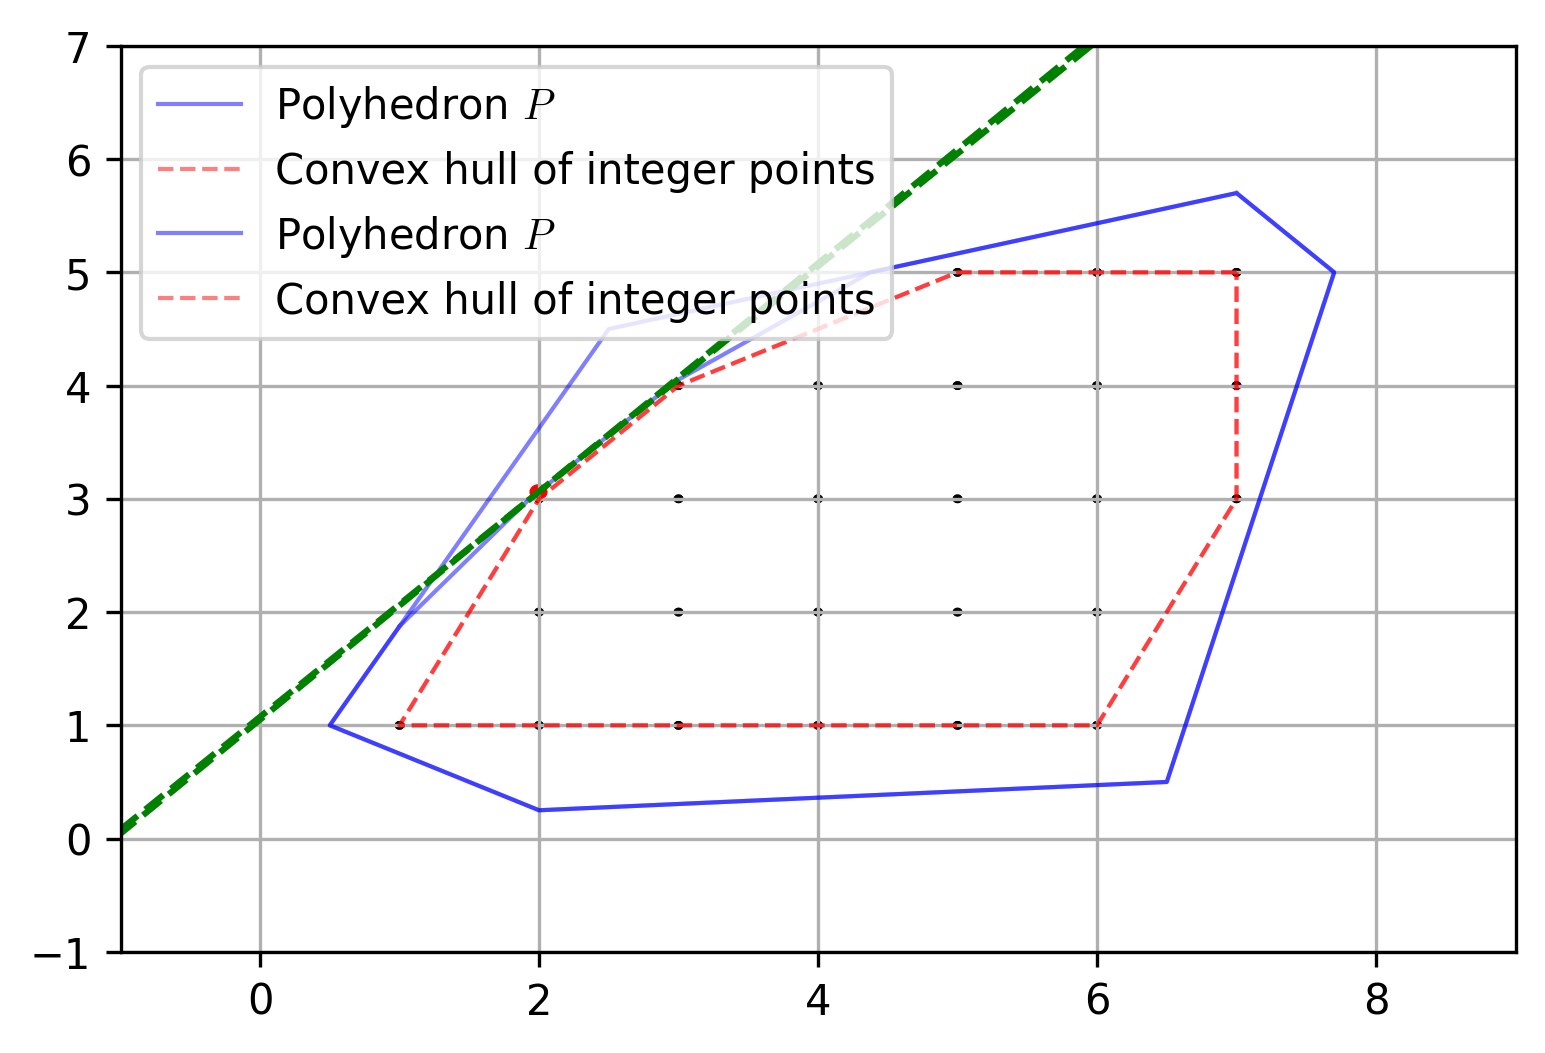

In [ ]:
start_time = time.time()
solve(MILPInstance(module_name = 'EX1'),
          whichCuts = [(gomoryMixedIntegerCut, {})],
          display = True, debug_print = False, use_cglp = False, filename = '1')
print("--- %s seconds ---" % (time.time() - start_time)) # время работы

Iteration  0
Current bound: -6.499999999999999
Current solution:  [3.75 2.75]
Adding cut:  [1.33333 0.     ] <= 4.0
Adding cut:  [0.      1.33333] <= 2.66667
Iteration  1
Current bound: -5.000015000037502
Current solution:  [3.0000075 2.0000075]
Integer solution found!
--- 1.0264217853546143 seconds ---


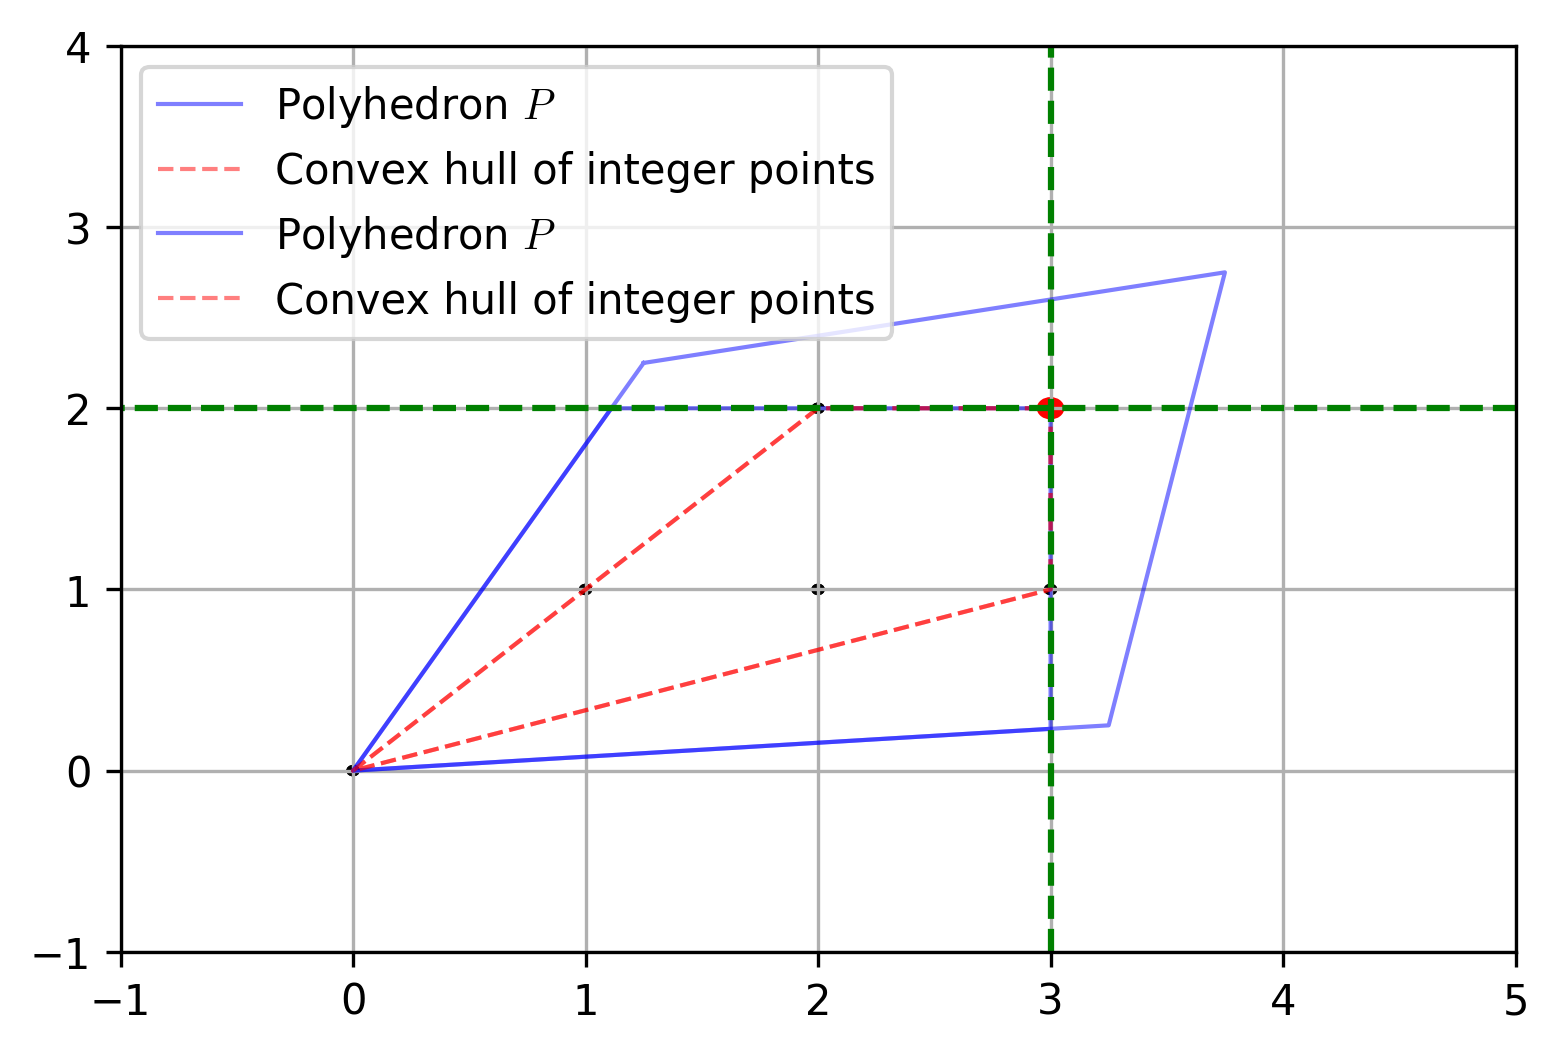

In [ ]:
start_time = time.time()
solve(MILPInstance(module_name = 'EX2'),
          whichCuts = [(gomoryMixedIntegerCut, {})],
          display = True, debug_print = False, use_cglp = False, filename = '2')
print("--- %s seconds ---" % (time.time() - start_time)) # время работы